# Самостоятельное задание.

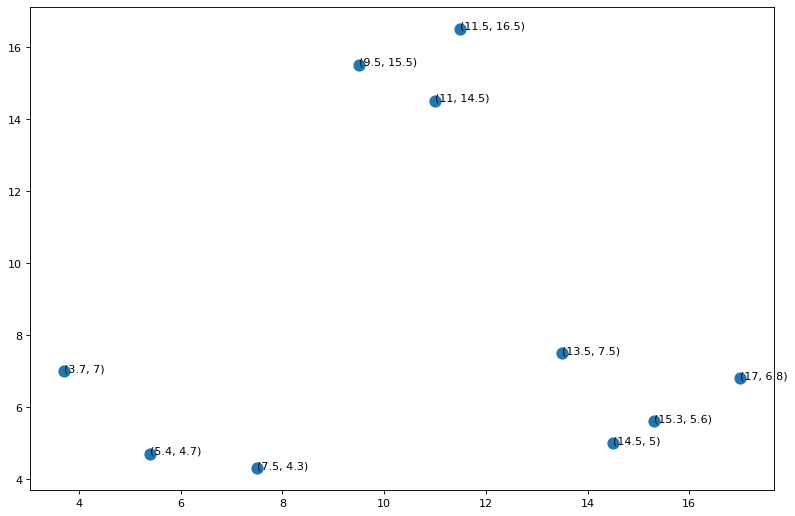

In [1]:
import matplotlib.pyplot as plt

x = [11.5, 9.5, 11, 13.5, 17, 15.3, 14.5, 3.7, 5.4, 7.5]
y = [16.5, 15.5, 14.5, 7.5, 6.8, 5.6, 5, 7, 4.7, 4.3]

plt.figure(figsize=(12, 8), dpi=80)
plt.scatter(x,y, s=100)

for i, txt in enumerate(zip(x, y)):
    plt.annotate(txt, (x[i], y[i]))

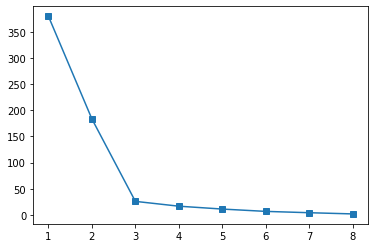

In [22]:
from sklearn.cluster import KMeans
import pandas as pd

X = {'x':x}
Y = {'y':y}
df = pd.concat([pd.DataFrame(X),pd.DataFrame(Y)], axis=1)

SSE = []
for i in range(1,9):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df)
  SSE.append(kmeans.inertia_)

plt.plot(range(1,9), SSE, marker='s');
plt.show()


In [17]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
Y_pred = kmeans.labels_
kmeans.predict(df)


array([1, 1, 1, 2, 2, 2, 2, 0, 0, 0], dtype=int32)

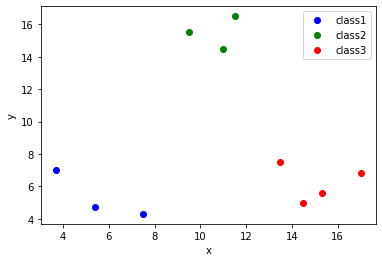

In [21]:
df['cluster'] = Y_pred
plt.plot(df[df['cluster']==0]['x'], df[df['cluster']==0]['y'], 'bo', label='class1')

plt.plot(df[df['cluster']==1]['x'], df[df['cluster']==1]['y'], 'go', label='class2')

plt.plot(df[df['cluster']==2]['x'], df[df['cluster']==2]['y'], 'ro', label='class3')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=0)
plt.show()

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f157928f310>,
                     colors='yellowbrick',
                     estimator=KMeans(max_iter=100, n_clusters=3,
                                      random_state=42))

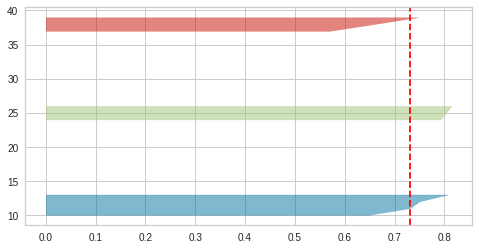

In [37]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(1, figsize=(8,4))

'''
Create KMeans instance for different number of clusters
'''
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=42)
'''
Create SilhouetteVisualizer instance with KMeans instance
Fit the visualizer
'''
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(df)
